#### Libraries

In [ ]:
import scipy.io as sio
import numpy as np
import os
import h5py
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Import Datasets

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MyDataset_ADT.zip to MyDataset_ADT.zip


### Load zip files

#### DHT

In [ ]:
zip_path_H = "MyDataset_DHT.zip"
extract_path_H = "MyDataset_DHT"

with zipfile.ZipFile(zip_path_H, 'r') as zip_ref:
    zip_ref.extractall(extract_path_H)

os.listdir(extract_path_H)

['Waving', 'Idle', 'Jumping']

#### RDT

In [ ]:
zip_path_R = "MyDataset_RDT.zip"
extract_path_R = "MyDataset_RDT"

with zipfile.ZipFile(zip_path_R, 'r') as zip_ref:
    zip_ref.extractall(extract_path_R)

os.listdir(extract_path_R)

['Idle', 'Waving', 'Jumping']

#### ADT

In [ ]:
zip_path_A = "MyDataset_ADT.zip"
extract_path_A = "MyDataset_ADT"

with zipfile.ZipFile(zip_path_A, 'r') as zip_ref:
    zip_ref.extractall(extract_path_A)

os.listdir(extract_path_A)

['Jumping', 'Waving', 'Idle']

### Define paths and classes

#### DHT

In [ ]:
# DATASET: MyDataset_DHT

base_path = "/content/MyDataset_DHT/"
classes = ['Waving', 'Idle', 'Jumping']

data_list = []
labels_list = []

print("Loading DHT dataset...")

for class_idx, class_name in enumerate(classes):
    class_folder = os.path.join(base_path, class_name)
    if not os.path.exists(class_folder):
        continue

    files = [f for f in os.listdir(class_folder) if f.endswith('.mat')]

    for f in files:
        file_path = os.path.join(class_folder, f)
        try:
            with h5py.File(file_path, 'r') as mat_file:
                tensor = np.array(mat_file['DHT_Tensor'])

                if tensor.ndim == 3:
                    tensor = tensor.transpose(2, 1, 0)

                data_list.append(tensor)
                labels_list.append(class_idx)

        except Exception as e:
            print(f"Error loading {f}: {e}")

X_DHT = np.array(data_list)
y_DHT = np.array(labels_list)

print(f"Loaded {len(X_DHT)} samples. Shape: {X_DHT.shape}")

X_DHT = X_DHT.transpose(0, 3, 1, 2)
X_DHT = np.expand_dims(X_DHT, axis=2)

print(f"Final DHT shape: {X_DHT.shape}")

Loading DHT dataset...
Loaded 1002 samples. Shape: (1002, 100, 128, 40)
Final DHT shape: (1002, 40, 1, 100, 128)


#### RDT

In [ ]:
# DATASET: MyDataset_RDT

base_path = "/content/MyDataset_RDT/"
classes = ['Waving', 'Idle', 'Jumping']

data_list = []
labels_list = []

print("Loading RDT dataset...")

for class_idx, class_name in enumerate(classes):
    class_folder = os.path.join(base_path, class_name)
    if not os.path.exists(class_folder):
        continue

    files = [f for f in os.listdir(class_folder) if f.endswith('.mat')]

    for f in files:
        file_path = os.path.join(class_folder, f)
        try:
            with h5py.File(file_path, 'r') as mat_file:
                tensor = np.array(mat_file['RDT_Tensor'])

                if tensor.ndim == 3:
                    tensor = tensor.transpose(2, 1, 0)

                data_list.append(tensor)
                labels_list.append(class_idx)

        except Exception as e:
            print(f"Error loading {f}: {e}")

X_RDT = np.array(data_list)
y_RDT = np.array(labels_list)

print(f"Loaded {len(X_RDT)} samples. Shape: {X_RDT.shape}")

X_RDT = X_RDT.transpose(0, 3, 1, 2)
X_RDT = np.expand_dims(X_RDT, axis=2)

print(f"Final RDT shape: {X_RDT.shape}")

Loading RDT dataset...
Loaded 1002 samples. Shape: (1002, 100, 128, 40)
Final RDT shape: (1002, 40, 1, 100, 128)


#### ADT

In [ ]:
# DATASET: MyDataset_ADT

base_path = "/content/MyDataset_ADT/"
classes = ['Waving', 'Idle', 'Jumping']

data_list = []
labels_list = []

print("Loading ADT dataset...")

for class_idx, class_name in enumerate(classes):
    class_folder = os.path.join(base_path, class_name)
    if not os.path.exists(class_folder):
        continue

    files = [f for f in os.listdir(class_folder) if f.endswith('.mat')]

    for f in files:
        file_path = os.path.join(class_folder, f)
        try:
            with h5py.File(file_path, 'r') as mat_file:
                tensor = np.array(mat_file['ADT_Tensor'])

                if tensor.ndim == 3:
                    tensor = tensor.transpose(2, 1, 0)

                data_list.append(tensor)
                labels_list.append(class_idx)

        except Exception as e:
            print(f"Error loading {f}: {e}")

X_ADT = np.array(data_list)
y_ADT = np.array(labels_list)

print(f"Loaded {len(X_ADT)} samples. Shape: {X_ADT.shape}")

X_ADT = X_ADT.transpose(0, 3, 1, 2)
X_ADT = np.expand_dims(X_ADT, axis=2)

print(f"Final ADT shape: {X_ADT.shape}")

Loading ADT dataset...
Loaded 1002 samples. Shape: (1002, 100, 128, 40)
Final ADT shape: (1002, 40, 1, 100, 128)


### Shuffle and Split Data (Convert to Tensor)

#### DHT

In [ ]:
X_DHT_train, X_DHT_test, y_DHT_train, y_DHT_test = train_test_split(
    X_DHT, y_DHT,
    test_size=0.25,
    random_state=42,
    shuffle=True,
    stratify=y_DHT
)

train_dataset_DHT = TensorDataset(
    torch.FloatTensor(X_DHT_train),
    torch.LongTensor(y_DHT_train)
)

test_dataset_DHT = TensorDataset(
    torch.FloatTensor(X_DHT_test),
    torch.LongTensor(y_DHT_test)
)

batch_size = 32
train_loader_DHT = DataLoader(train_dataset_DHT, batch_size=batch_size, shuffle=True)
test_loader_DHT  = DataLoader(test_dataset_DHT,  batch_size=batch_size, shuffle=False)

print("\n--- DHT Split Results ---")
print(f"Training samples: {len(X_DHT_train)}")
print(f"Evaluation samples: {len(X_DHT_test)}")
print(f"Class distribution in Train: {np.bincount(y_DHT_train)}")



--- DHT Split Results ---
Training samples: 751
Evaluation samples: 251
Class distribution in Train: [251 250 250]


#### RDT

In [ ]:
X_RDT_train, X_RDT_test, y_RDT_train, y_RDT_test = train_test_split(
    X_RDT, y_RDT,
    test_size=0.25,
    random_state=42,
    shuffle=True,
    stratify=y_RDT
)

train_dataset_RDT = TensorDataset(
    torch.FloatTensor(X_RDT_train),
    torch.LongTensor(y_RDT_train)
)

test_dataset_RDT = TensorDataset(
    torch.FloatTensor(X_RDT_test),
    torch.LongTensor(y_RDT_test)
)

batch_size = 32
train_loader_RDT = DataLoader(train_dataset_RDT, batch_size=batch_size, shuffle=True)
test_loader_RDT  = DataLoader(test_dataset_RDT,  batch_size=batch_size, shuffle=False)

print("\n--- RDT Split Results ---")
print(f"Training samples: {len(X_RDT_train)}")
print(f"Evaluation samples: {len(X_RDT_test)}")
print(f"Class distribution in Train: {np.bincount(y_RDT_train)}")


--- RDT Split Results ---
Training samples: 751
Evaluation samples: 251
Class distribution in Train: [251 250 250]


#### ADT

In [ ]:
X_ADT_train, X_ADT_test, y_ADT_train, y_ADT_test = train_test_split(
    X_ADT, y_ADT,
    test_size=0.25,
    random_state=42,
    shuffle=True,
    stratify=y_ADT
)

train_dataset_ADT = TensorDataset(
    torch.FloatTensor(X_ADT_train),
    torch.LongTensor(y_ADT_train)
)

test_dataset_ADT = TensorDataset(
    torch.FloatTensor(X_ADT_test),
    torch.LongTensor(y_ADT_test)
)

batch_size = 32
train_loader_ADT = DataLoader(train_dataset_ADT, batch_size=batch_size, shuffle=True)
test_loader_ADT  = DataLoader(test_dataset_ADT,  batch_size=batch_size, shuffle=False)

print("\n--- RDT Split Results ---")
print(f"Training samples: {len(X_ADT_train)}")
print(f"Evaluation samples: {len(X_ADT_test)}")
print(f"Class distribution in Train: {np.bincount(y_ADT_train)}")


--- RDT Split Results ---
Training samples: 751
Evaluation samples: 251
Class distribution in Train: [251 250 250]


## Model Implementation

### Model Blocks

#### CNN

In [ ]:
class CNNBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(CNNBlock, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(negative_slope=0.01),
            nn.MaxPool2d(kernel_size=4, stride=4),
            nn.Dropout(p=0.05)
        )

    def forward(self, x):
        return self.conv(x)

#### LSTM

In [ ]:
class LSTMBlock(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1, num_classes=4):
        super(LSTMBlock, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        out = self.fc(out)
        return out

#### Classifier

In [ ]:
class SimpleClassifier(nn.Module):
    def __init__(self, input_size, num_classes=4):
        super(SimpleClassifier, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        x = torch.mean(x, dim=1)
        return self.fc(x)

### Models

#### 1 Layer CNN

In [ ]:
class Model_1CNN(nn.Module):
    def __init__(self):
        super(Model_1CNN, self).__init__()
        self.cnn = CNNBlock(1, 60)
        self.classifier = SimpleClassifier(input_size=48000)

    def forward(self, x):
        batch, time, c, h, w = x.size()
        x = x.view(batch * time, c, h, w)
        x = self.cnn(x)
        x = x.view(batch, time, -1)
        return self.classifier(x)

#### 2 Layer CNN

In [ ]:
class Model_2CNN(nn.Module):
    def __init__(self):
        super(Model_2CNN, self).__init__()
        self.cnn = nn.Sequential(
            CNNBlock(1, 60),
            CNNBlock(60, 4)
        )
        self.classifier = SimpleClassifier(input_size=192)

    def forward(self, x):
        batch, time, c, h, w = x.size()
        x = x.view(batch * time, c, h, w)
        x = self.cnn(x)
        x = x.view(batch, time, -1)
        return self.classifier(x)

#### 1 Layer LSTM

In [ ]:
class Model_1LSTM(nn.Module):
    def __init__(self):
        super(Model_1LSTM, self).__init__()
        self.lstm = LSTMBlock(input_size=12800, hidden_size=128, num_layers=1)

    def forward(self, x):
        batch, time, c, h, w = x.size()
        x = x.view(batch, time, -1)
        return self.lstm(x)

#### 2 Layer LSTM

In [ ]:
class Model_2LSTM(nn.Module):
    def __init__(self):
        super(Model_2LSTM, self).__init__()
        self.lstm = LSTMBlock(input_size=12800, hidden_size=128, num_layers=2)

    def forward(self, x):
        batch, time, c, h, w = x.size()
        x = x.view(batch, time, -1)
        return self.lstm(x)

#### 1 Layer CNN - 1 Layer LSTM

In [ ]:
class Model_1CNN_1LSTM(nn.Module):
    def __init__(self):
        super(Model_1CNN_1LSTM, self).__init__()
        self.cnn = CNNBlock(1, 60)
        self.lstm = LSTMBlock(input_size=48000, hidden_size=128, num_layers=1)

    def forward(self, x):
        batch, time, c, h, w = x.size()
        x = x.view(batch * time, c, h, w)
        x = self.cnn(x)
        x = x.view(batch, time, -1)
        return self.lstm(x)

#### 2 Layer CNN - 1 Layer LSTM

In [ ]:
class Model_2CNN_1LSTM(nn.Module):
    def __init__(self):
        super(Model_2CNN_1LSTM, self).__init__()
        self.cnn = nn.Sequential(
            CNNBlock(1, 60),
            CNNBlock(60, 4)
        )
        self.lstm = LSTMBlock(input_size=192, hidden_size=128, num_layers=1)

    def forward(self, x):
        batch, time, c, h, w = x.size()
        x = x.view(batch * time, c, h, w)
        x = self.cnn(x)
        x = x.view(batch, time, -1)
        return self.lstm(x)

#### 1 Layer CNN - 2 Layer LSTM

In [ ]:
class Model_1CNN_2LSTM(nn.Module):
    def __init__(self):
        super(Model_1CNN_2LSTM, self).__init__()
        self.cnn = CNNBlock(1, 60)
        self.lstm = LSTMBlock(input_size=48000, hidden_size=128, num_layers=2)

    def forward(self, x):
        batch, time, c, h, w = x.size()
        x = x.view(batch * time, c, h, w)
        x = self.cnn(x)
        x = x.view(batch, time, -1)
        return self.lstm(x)

#### 2 Layer CNN - 2 Layer LSTM

In [ ]:
class Model_2CNN_2LSTM(nn.Module):
    def __init__(self):
        super(Model_2CNN_2LSTM, self).__init__()
        self.cnn = nn.Sequential(
            CNNBlock(1, 60),
            CNNBlock(60, 4)
        )
        self.lstm = LSTMBlock(input_size=192, hidden_size=128, num_layers=2)

    def forward(self, x):
        batch, time, c, h, w = x.size()
        x = x.view(batch * time, c, h, w)
        x = self.cnn(x)
        x = x.view(batch, time, -1)
        return self.lstm(x)

## Training and Evaluation

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()

### DHT

#### 1 Layer CNN

In [ ]:
model = Model_1CNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_DHT:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader_DHT:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_DHT):.4f}, Test Accuracy: {accuracy:.2f}%')

Epoch [1/8], Loss: 1.0620, Test Accuracy: 64.54%
Epoch [2/8], Loss: 0.5600, Test Accuracy: 88.45%
Epoch [3/8], Loss: 0.3651, Test Accuracy: 95.22%
Epoch [4/8], Loss: 0.2692, Test Accuracy: 96.41%
Epoch [5/8], Loss: 0.2137, Test Accuracy: 98.41%
Epoch [6/8], Loss: 0.1709, Test Accuracy: 98.41%
Epoch [7/8], Loss: 0.1475, Test Accuracy: 98.41%
Epoch [8/8], Loss: 0.1266, Test Accuracy: 98.41%


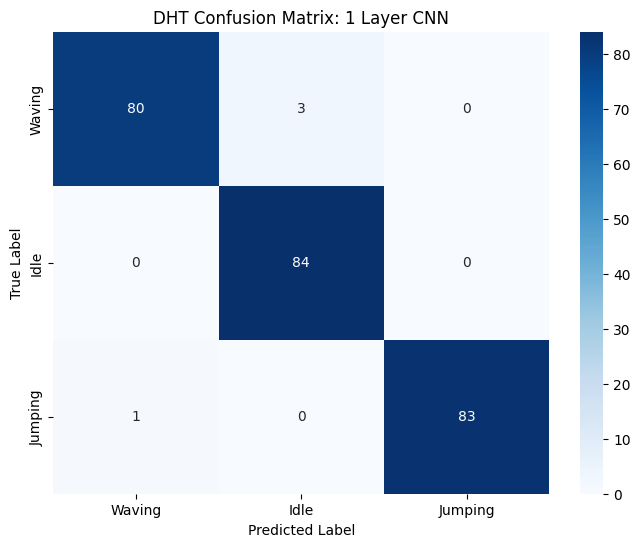

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_DHT:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('DHT Confusion Matrix: 1 Layer CNN')
plt.show()

#### 2 Layer CNN

In [ ]:
model = Model_2CNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001) # Lower LR for small dataset
num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_DHT:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader_DHT:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_DHT):.4f}, Test Accuracy: {accuracy:.2f}%')

Epoch [1/8], Loss: 1.7563, Test Accuracy: 33.47%
Epoch [2/8], Loss: 1.6135, Test Accuracy: 60.56%
Epoch [3/8], Loss: 1.4914, Test Accuracy: 60.96%
Epoch [4/8], Loss: 1.3869, Test Accuracy: 63.75%
Epoch [5/8], Loss: 1.3070, Test Accuracy: 65.74%
Epoch [6/8], Loss: 1.2372, Test Accuracy: 66.14%
Epoch [7/8], Loss: 1.1750, Test Accuracy: 66.53%
Epoch [8/8], Loss: 1.1280, Test Accuracy: 66.53%


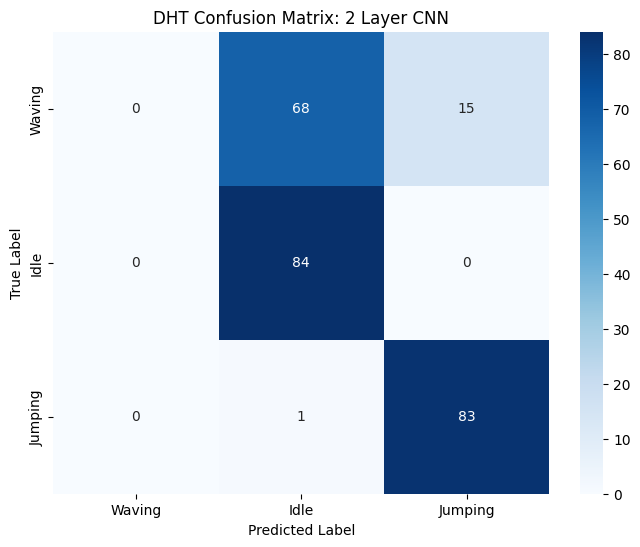

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_DHT:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('DHT Confusion Matrix: 2 Layer CNN')
plt.show()

#### 1 Layer LSTM

In [ ]:
model = Model_1LSTM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) # Lower LR for small dataset
num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_DHT:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader_DHT:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_DHT):.4f}, Test Accuracy: {accuracy:.2f}%')

Epoch [1/8], Loss: 1.3480, Test Accuracy: 41.04%
Epoch [2/8], Loss: 1.3087, Test Accuracy: 64.14%
Epoch [3/8], Loss: 1.2568, Test Accuracy: 81.27%
Epoch [4/8], Loss: 1.1578, Test Accuracy: 48.21%
Epoch [5/8], Loss: 0.9547, Test Accuracy: 86.45%
Epoch [6/8], Loss: 0.5913, Test Accuracy: 90.44%
Epoch [7/8], Loss: 0.4114, Test Accuracy: 91.63%
Epoch [8/8], Loss: 0.2810, Test Accuracy: 94.42%


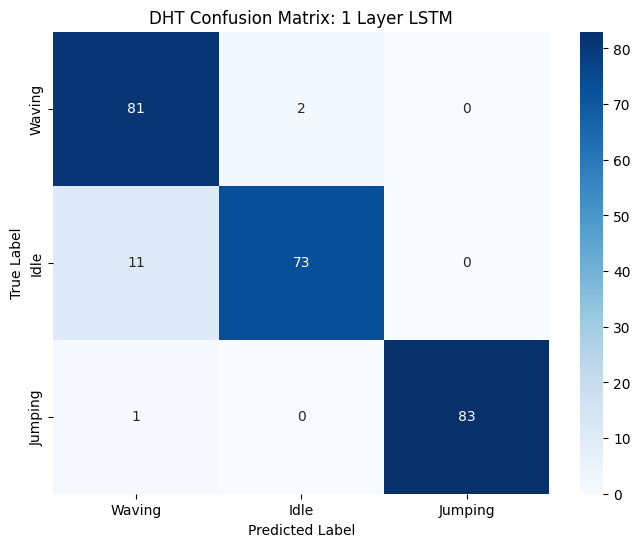

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_DHT:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('DHT Confusion Matrix: 1 Layer LSTM')
plt.show()

#### 2 Layer LSTM

In [ ]:
model = Model_2LSTM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) # Lower LR for small dataset
num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_DHT:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader_DHT:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_DHT):.4f}, Test Accuracy: {accuracy:.2f}%')

Epoch [1/8], Loss: 1.3682, Test Accuracy: 33.07%
Epoch [2/8], Loss: 1.3232, Test Accuracy: 33.07%
Epoch [3/8], Loss: 1.2248, Test Accuracy: 33.47%
Epoch [4/8], Loss: 1.0627, Test Accuracy: 75.70%
Epoch [5/8], Loss: 0.7722, Test Accuracy: 78.88%
Epoch [6/8], Loss: 0.4507, Test Accuracy: 98.01%
Epoch [7/8], Loss: 0.2841, Test Accuracy: 97.21%
Epoch [8/8], Loss: 0.1742, Test Accuracy: 97.21%


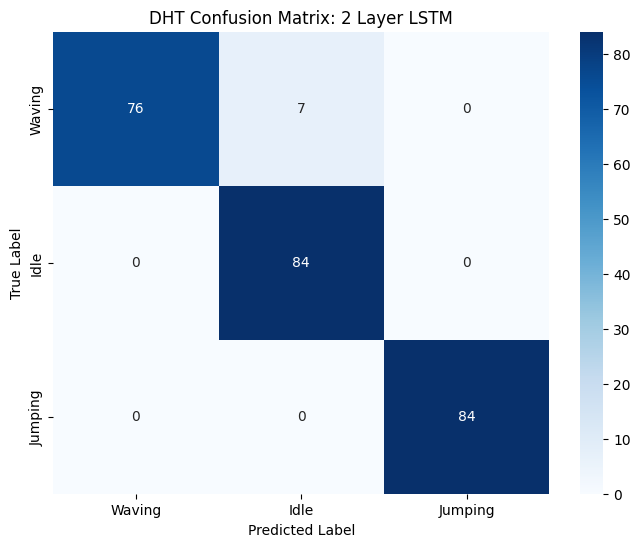

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_DHT:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('DHT Confusion Matrix: 2 Layer LSTM')
plt.show()

#### 1 Layer CNN - 1 Layer LSTM

In [ ]:
model = Model_1CNN_1LSTM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) # Lower LR for small dataset
num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_DHT:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader_DHT:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_DHT):.4f}, Test Accuracy: {accuracy:.2f}%')

Epoch [1/8], Loss: 1.2042, Test Accuracy: 51.00%
Epoch [2/8], Loss: 0.8283, Test Accuracy: 79.68%
Epoch [3/8], Loss: 0.6153, Test Accuracy: 94.42%
Epoch [4/8], Loss: 0.4603, Test Accuracy: 96.02%
Epoch [5/8], Loss: 0.3442, Test Accuracy: 96.81%
Epoch [6/8], Loss: 0.2572, Test Accuracy: 98.80%
Epoch [7/8], Loss: 0.1954, Test Accuracy: 99.20%
Epoch [8/8], Loss: 0.1498, Test Accuracy: 99.20%


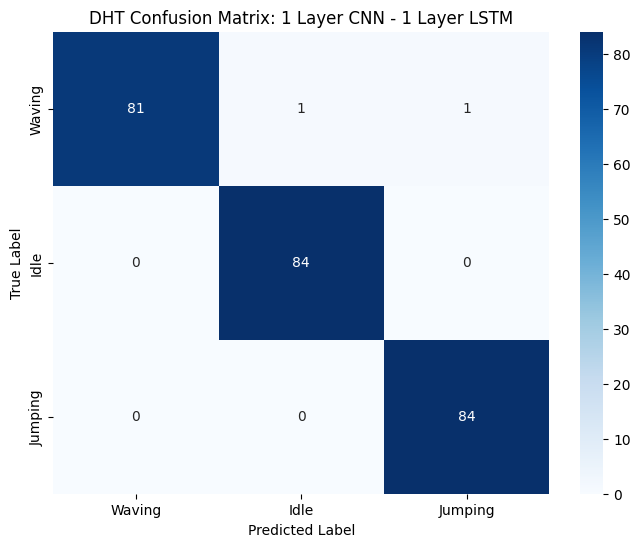

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_DHT:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('DHT Confusion Matrix: 1 Layer CNN - 1 Layer LSTM')
plt.show()

#### 2 Layer CNN - 1 Layer LSTM

In [ ]:
model = Model_2CNN_1LSTM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) # Lower LR for small dataset
num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_DHT:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader_DHT:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_DHT):.4f}, Test Accuracy: {accuracy:.2f}%')

Epoch [1/8], Loss: 1.2225, Test Accuracy: 33.47%
Epoch [2/8], Loss: 1.0633, Test Accuracy: 34.66%
Epoch [3/8], Loss: 0.9077, Test Accuracy: 68.53%
Epoch [4/8], Loss: 0.7160, Test Accuracy: 84.46%
Epoch [5/8], Loss: 0.5320, Test Accuracy: 88.45%
Epoch [6/8], Loss: 0.3727, Test Accuracy: 93.23%
Epoch [7/8], Loss: 0.2557, Test Accuracy: 95.22%
Epoch [8/8], Loss: 0.1689, Test Accuracy: 96.41%


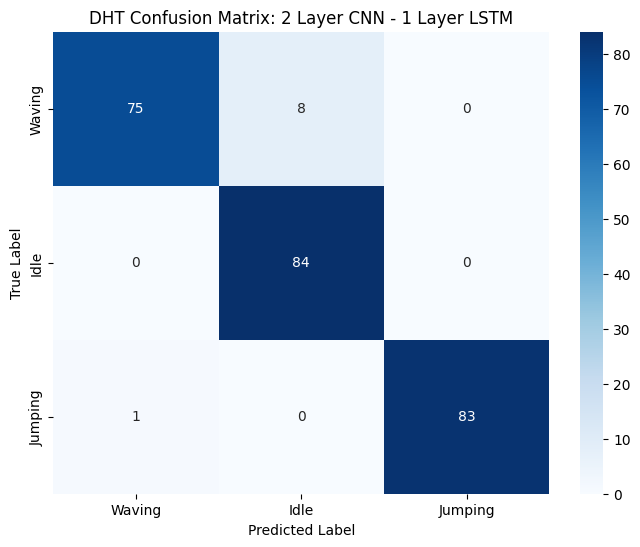

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_DHT:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('DHT Confusion Matrix: 2 Layer CNN - 1 Layer LSTM')
plt.show()

#### 1 Layer CNN - 2 Layer LSTM

In [ ]:
model = Model_1CNN_2LSTM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) # Lower LR for small dataset
num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_DHT:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader_DHT:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_DHT):.4f}, Test Accuracy: {accuracy:.2f}%')

Epoch [1/8], Loss: 1.2842, Test Accuracy: 49.80%
Epoch [2/8], Loss: 0.9753, Test Accuracy: 84.46%
Epoch [3/8], Loss: 0.5440, Test Accuracy: 97.61%
Epoch [4/8], Loss: 0.2091, Test Accuracy: 98.80%
Epoch [5/8], Loss: 0.0851, Test Accuracy: 99.20%
Epoch [6/8], Loss: 0.0511, Test Accuracy: 99.20%
Epoch [7/8], Loss: 0.0333, Test Accuracy: 98.41%
Epoch [8/8], Loss: 0.0261, Test Accuracy: 98.41%


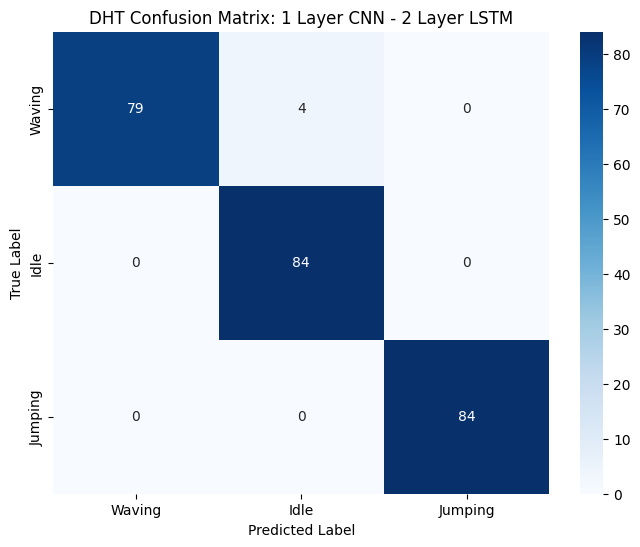

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_DHT:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('DHT Confusion Matrix: 1 Layer CNN - 2 Layer LSTM')
plt.show()

#### 2 Layer CNN - 2 Layer LSTM

In [ ]:
model = Model_2CNN_2LSTM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) # Lower LR for small dataset
num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_DHT:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader_DHT:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_DHT):.4f}, Test Accuracy: {accuracy:.2f}%')

Epoch [1/8], Loss: 1.2941, Test Accuracy: 33.07%
Epoch [2/8], Loss: 1.1295, Test Accuracy: 33.07%
Epoch [3/8], Loss: 0.8507, Test Accuracy: 84.06%
Epoch [4/8], Loss: 0.4383, Test Accuracy: 97.21%
Epoch [5/8], Loss: 0.1726, Test Accuracy: 98.41%
Epoch [6/8], Loss: 0.1117, Test Accuracy: 97.61%
Epoch [7/8], Loss: 0.0873, Test Accuracy: 99.20%
Epoch [8/8], Loss: 0.0545, Test Accuracy: 99.20%


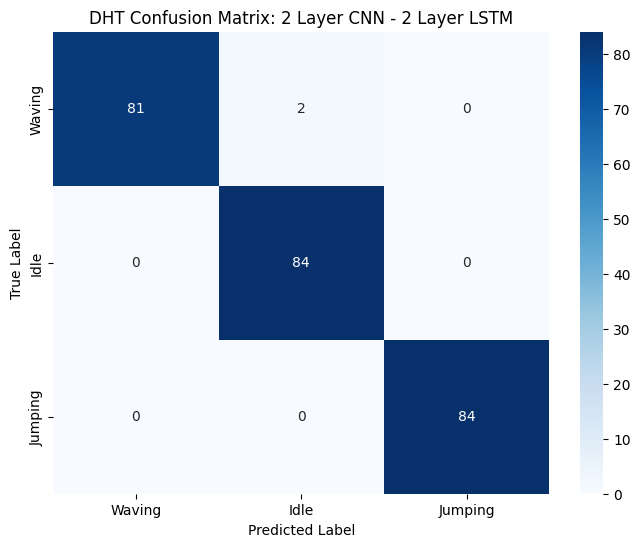

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_DHT:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('DHT Confusion Matrix: 2 Layer CNN - 2 Layer LSTM')
plt.show()

### RDT

#### 1 Layer CNN

In [ ]:
model = Model_1CNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001) # Lower LR for small dataset
num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_RDT:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader_RDT:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_RDT):.4f}, Test Accuracy: {accuracy:.2f}%')

Epoch [1/8], Loss: 1.2345, Test Accuracy: 46.22%
Epoch [2/8], Loss: 0.6601, Test Accuracy: 88.84%
Epoch [3/8], Loss: 0.4407, Test Accuracy: 99.20%
Epoch [4/8], Loss: 0.3262, Test Accuracy: 99.60%
Epoch [5/8], Loss: 0.2617, Test Accuracy: 99.20%
Epoch [6/8], Loss: 0.2161, Test Accuracy: 99.20%
Epoch [7/8], Loss: 0.1851, Test Accuracy: 99.20%
Epoch [8/8], Loss: 0.1603, Test Accuracy: 99.20%


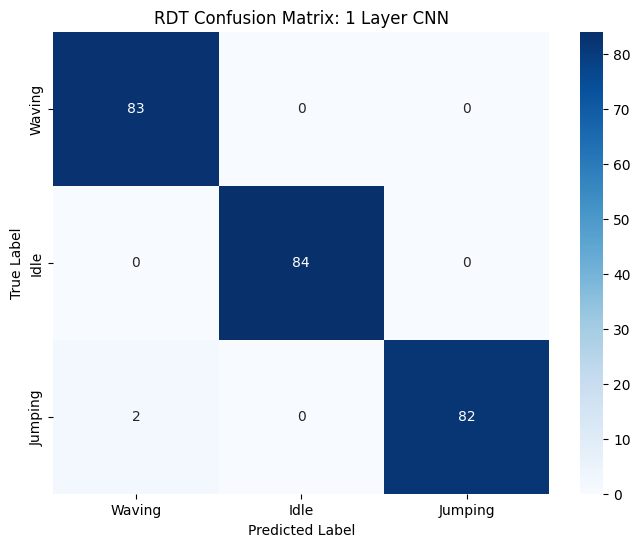

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_RDT:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('RDT Confusion Matrix: 1 Layer CNN')
plt.show()

#### 2 Layer CNN

In [ ]:
model = Model_2CNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001) # Lower LR for small dataset
num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_RDT:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader_RDT:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_RDT):.4f}, Test Accuracy: {accuracy:.2f}%')

Epoch [1/8], Loss: 1.4064, Test Accuracy: 33.07%
Epoch [2/8], Loss: 1.3627, Test Accuracy: 33.47%
Epoch [3/8], Loss: 1.3071, Test Accuracy: 34.26%
Epoch [4/8], Loss: 1.2624, Test Accuracy: 35.06%
Epoch [5/8], Loss: 1.2168, Test Accuracy: 35.46%
Epoch [6/8], Loss: 1.1833, Test Accuracy: 39.04%
Epoch [7/8], Loss: 1.1456, Test Accuracy: 41.83%
Epoch [8/8], Loss: 1.1203, Test Accuracy: 45.42%


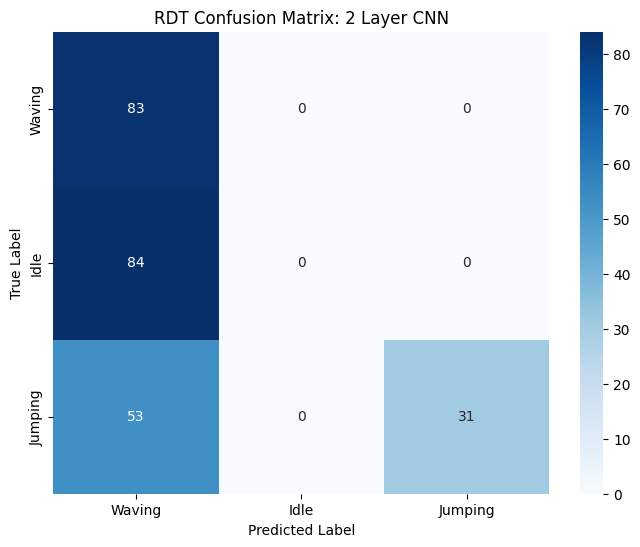

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_RDT:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('RDT Confusion Matrix: 2 Layer CNN')
plt.show()

#### 1 Layer LSTM

In [ ]:
model = Model_1LSTM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) # Lower LR for small dataset
num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_RDT:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader_RDT:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_RDT):.4f}, Test Accuracy: {accuracy:.2f}%')

Epoch [1/8], Loss: 1.3619, Test Accuracy: 60.56%
Epoch [2/8], Loss: 1.2858, Test Accuracy: 84.06%
Epoch [3/8], Loss: 1.1889, Test Accuracy: 88.05%
Epoch [4/8], Loss: 1.0123, Test Accuracy: 92.83%
Epoch [5/8], Loss: 0.6338, Test Accuracy: 96.02%
Epoch [6/8], Loss: 0.2958, Test Accuracy: 96.81%
Epoch [7/8], Loss: 0.1736, Test Accuracy: 94.02%
Epoch [8/8], Loss: 0.1350, Test Accuracy: 96.81%


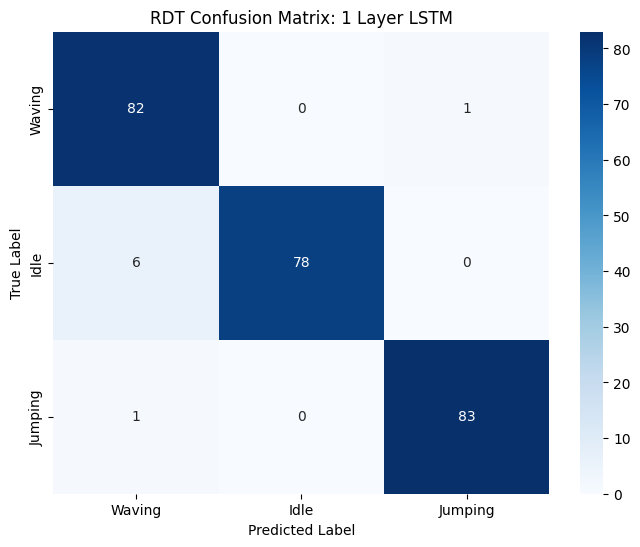

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_RDT:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('RDT Confusion Matrix: 1 Layer LSTM')
plt.show()

#### 2 Layer LSTM

In [ ]:
model = Model_2LSTM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) # Lower LR for small dataset
num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_RDT:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader_RDT:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_RDT):.4f}, Test Accuracy: {accuracy:.2f}%')

Epoch [1/8], Loss: 1.3598, Test Accuracy: 53.39%
Epoch [2/8], Loss: 1.2924, Test Accuracy: 45.42%
Epoch [3/8], Loss: 1.1232, Test Accuracy: 54.98%
Epoch [4/8], Loss: 0.7243, Test Accuracy: 93.63%
Epoch [5/8], Loss: 0.2494, Test Accuracy: 97.61%
Epoch [6/8], Loss: 0.1372, Test Accuracy: 96.81%
Epoch [7/8], Loss: 0.0880, Test Accuracy: 97.61%
Epoch [8/8], Loss: 0.1043, Test Accuracy: 96.02%


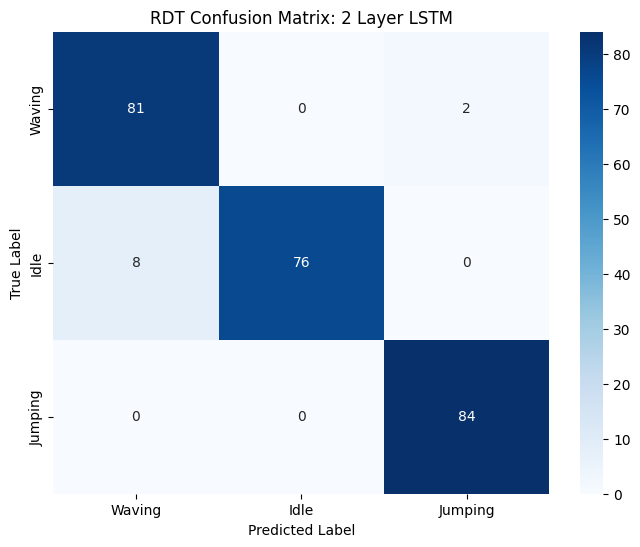

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_RDT:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('RDT Confusion Matrix: 2 Layer LSTM')
plt.show()

#### 1 Layer CNN - 1 Layer LSTM

In [ ]:
model = Model_1CNN_1LSTM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) # Lower LR for small dataset
num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_RDT:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader_RDT:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_RDT):.4f}, Test Accuracy: {accuracy:.2f}%')

Epoch [1/8], Loss: 1.1308, Test Accuracy: 76.49%
Epoch [2/8], Loss: 0.7282, Test Accuracy: 90.04%
Epoch [3/8], Loss: 0.4934, Test Accuracy: 94.42%
Epoch [4/8], Loss: 0.3627, Test Accuracy: 97.21%
Epoch [5/8], Loss: 0.2704, Test Accuracy: 98.80%
Epoch [6/8], Loss: 0.2036, Test Accuracy: 98.41%
Epoch [7/8], Loss: 0.1622, Test Accuracy: 98.80%
Epoch [8/8], Loss: 0.1302, Test Accuracy: 98.80%


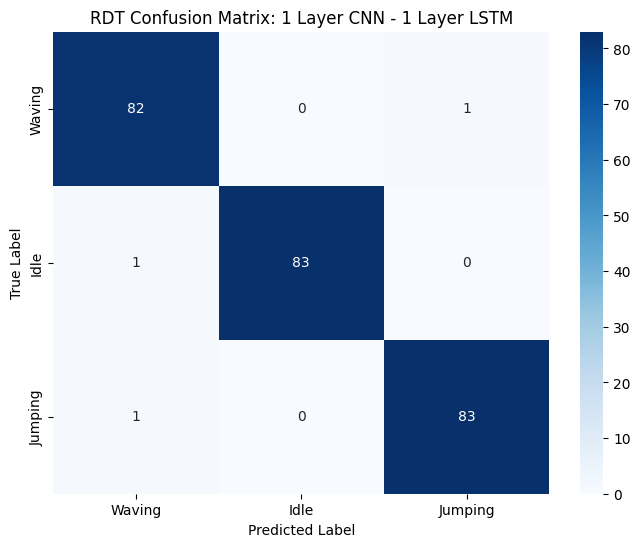

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_RDT:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('RDT Confusion Matrix: 1 Layer CNN - 1 Layer LSTM')
plt.show()

#### 2 Layer CNN - 1 Layer LSTM

In [ ]:
model = Model_2CNN_1LSTM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) # Lower LR for small dataset
num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_RDT:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader_RDT:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_RDT):.4f}, Test Accuracy: {accuracy:.2f}%')

Epoch [1/8], Loss: 1.3054, Test Accuracy: 33.47%
Epoch [2/8], Loss: 1.0992, Test Accuracy: 57.77%
Epoch [3/8], Loss: 0.9279, Test Accuracy: 79.28%
Epoch [4/8], Loss: 0.7202, Test Accuracy: 92.43%
Epoch [5/8], Loss: 0.5356, Test Accuracy: 95.22%
Epoch [6/8], Loss: 0.3751, Test Accuracy: 95.62%
Epoch [7/8], Loss: 0.2626, Test Accuracy: 96.02%
Epoch [8/8], Loss: 0.1830, Test Accuracy: 97.21%


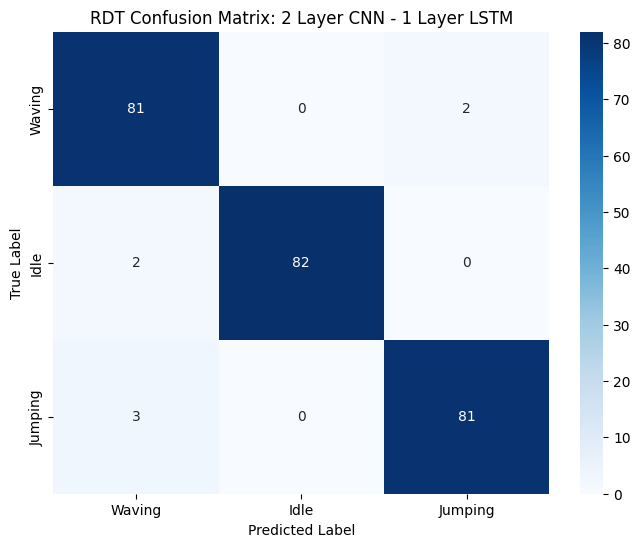

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_RDT:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('RDT Confusion Matrix: 2 Layer CNN - 1 Layer LSTM')
plt.show()

#### 1 Layer CNN - 2 Layer LSTM

In [ ]:
model = Model_1CNN_2LSTM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) # Lower LR for small dataset
num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_RDT:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader_RDT:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_RDT):.4f}, Test Accuracy: {accuracy:.2f}%')

Epoch [1/8], Loss: 1.2284, Test Accuracy: 63.75%
Epoch [2/8], Loss: 0.8857, Test Accuracy: 95.22%
Epoch [3/8], Loss: 0.4841, Test Accuracy: 99.20%
Epoch [4/8], Loss: 0.1795, Test Accuracy: 99.20%
Epoch [5/8], Loss: 0.0752, Test Accuracy: 99.20%
Epoch [6/8], Loss: 0.0492, Test Accuracy: 98.80%
Epoch [7/8], Loss: 0.0343, Test Accuracy: 99.20%
Epoch [8/8], Loss: 0.0238, Test Accuracy: 99.20%


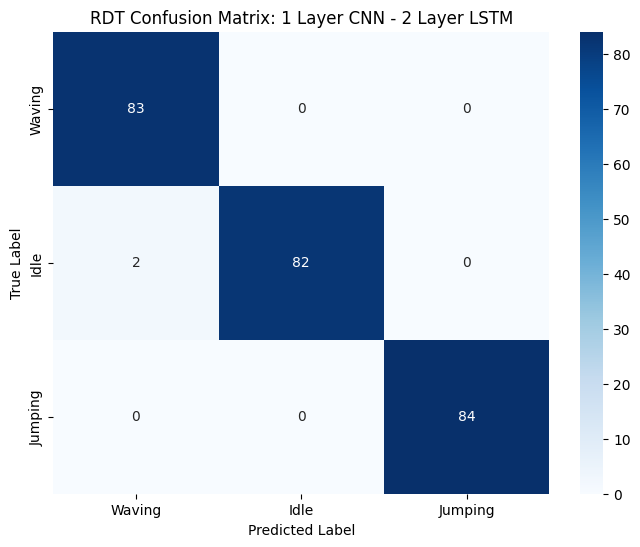

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_RDT:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('RDT Confusion Matrix: 1 Layer CNN - 2 Layer LSTM')
plt.show()

#### 2 Layer CNN - 2 Layer LSTM

In [ ]:
model = Model_2CNN_2LSTM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) # Lower LR for small dataset
num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_RDT:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader_RDT:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_RDT):.4f}, Test Accuracy: {accuracy:.2f}%')

Epoch [1/8], Loss: 1.3328, Test Accuracy: 33.47%
Epoch [2/8], Loss: 1.1644, Test Accuracy: 38.65%
Epoch [3/8], Loss: 0.8669, Test Accuracy: 93.23%
Epoch [4/8], Loss: 0.4556, Test Accuracy: 99.20%
Epoch [5/8], Loss: 0.1798, Test Accuracy: 97.61%
Epoch [6/8], Loss: 0.0907, Test Accuracy: 98.41%
Epoch [7/8], Loss: 0.0821, Test Accuracy: 98.41%
Epoch [8/8], Loss: 0.0487, Test Accuracy: 99.20%


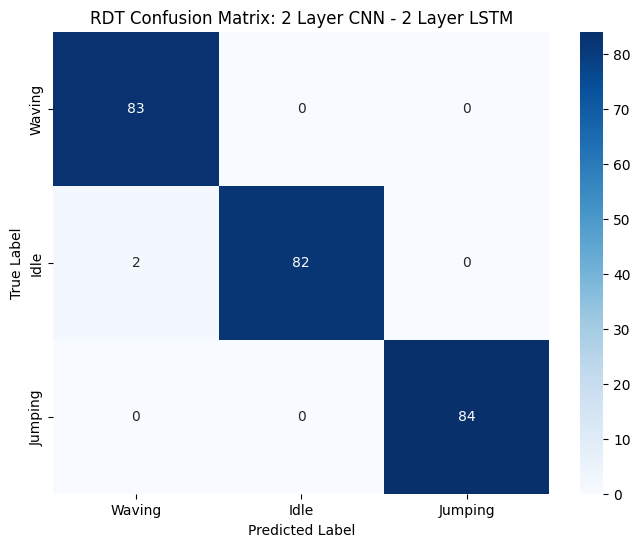

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_RDT:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('RDT Confusion Matrix: 2 Layer CNN - 2 Layer LSTM')
plt.show()

### ADT

#### 1 Layer CNN

In [ ]:
model = Model_1CNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001) # Lower LR for small dataset
num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_ADT:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader_ADT:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_ADT):.4f}, Test Accuracy: {accuracy:.2f}%')

Epoch [1/8], Loss: 0.8341, Test Accuracy: 48.21%
Epoch [2/8], Loss: 0.3584, Test Accuracy: 95.22%
Epoch [3/8], Loss: 0.2223, Test Accuracy: 98.41%
Epoch [4/8], Loss: 0.1550, Test Accuracy: 99.20%
Epoch [5/8], Loss: 0.1208, Test Accuracy: 99.20%
Epoch [6/8], Loss: 0.0985, Test Accuracy: 99.20%
Epoch [7/8], Loss: 0.0816, Test Accuracy: 99.20%
Epoch [8/8], Loss: 0.0697, Test Accuracy: 99.20%


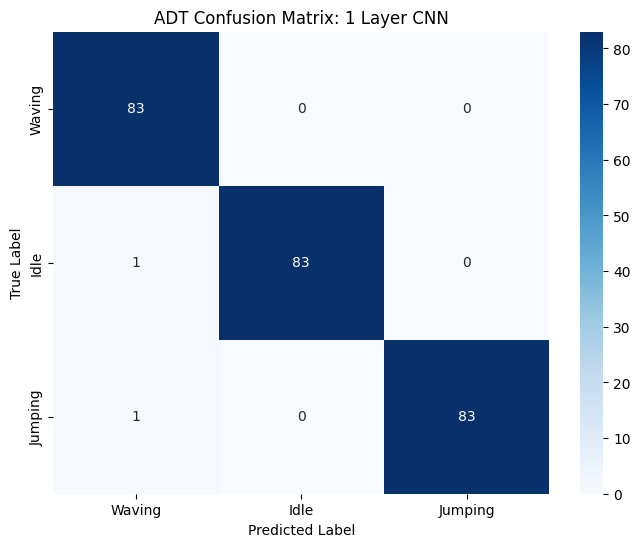

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_ADT:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('ADT Confusion Matrix: 1 Layer CNN')
plt.show()

#### 2 Layer CNN

In [ ]:
model = Model_2CNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001) # Lower LR for small dataset
num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_ADT:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader_ADT:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_ADT):.4f}, Test Accuracy: {accuracy:.2f}%')

Epoch [1/8], Loss: 1.8095, Test Accuracy: 32.67%
Epoch [2/8], Loss: 1.7251, Test Accuracy: 21.12%
Epoch [3/8], Loss: 1.6387, Test Accuracy: 20.32%
Epoch [4/8], Loss: 1.5620, Test Accuracy: 22.71%
Epoch [5/8], Loss: 1.5077, Test Accuracy: 23.11%
Epoch [6/8], Loss: 1.4640, Test Accuracy: 25.50%
Epoch [7/8], Loss: 1.4234, Test Accuracy: 26.69%
Epoch [8/8], Loss: 1.3931, Test Accuracy: 27.89%


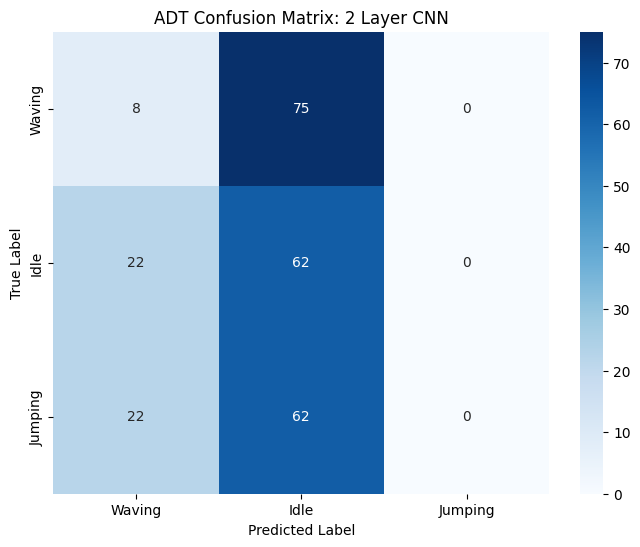

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_ADT:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('ADT Confusion Matrix: 2 Layer CNN')
plt.show()

#### 1 Layer LSTM

In [ ]:
model = Model_1LSTM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) # Lower LR for small dataset
num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_ADT:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader_ADT:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_ADT):.4f}, Test Accuracy: {accuracy:.2f}%')

Epoch [1/8], Loss: 1.3383, Test Accuracy: 56.18%
Epoch [2/8], Loss: 1.2911, Test Accuracy: 58.17%
Epoch [3/8], Loss: 1.2280, Test Accuracy: 50.20%
Epoch [4/8], Loss: 1.1080, Test Accuracy: 54.58%
Epoch [5/8], Loss: 0.7943, Test Accuracy: 92.43%
Epoch [6/8], Loss: 0.5372, Test Accuracy: 80.48%
Epoch [7/8], Loss: 0.4487, Test Accuracy: 97.61%
Epoch [8/8], Loss: 0.2940, Test Accuracy: 96.02%


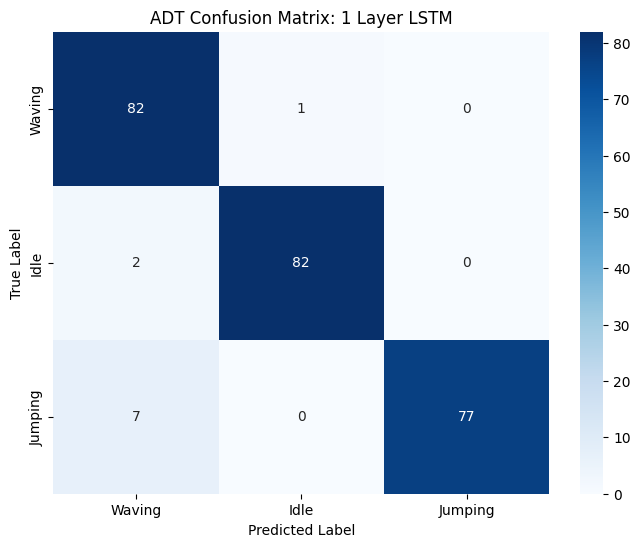

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_ADT:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('ADT Confusion Matrix: 1 Layer LSTM')
plt.show()

#### 2 Layer LSTM

In [ ]:
model = Model_2LSTM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) # Lower LR for small dataset
num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_ADT:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader_ADT:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_ADT):.4f}, Test Accuracy: {accuracy:.2f}%')

Epoch [1/8], Loss: 1.3767, Test Accuracy: 35.46%
Epoch [2/8], Loss: 1.3230, Test Accuracy: 41.83%
Epoch [3/8], Loss: 1.1878, Test Accuracy: 51.00%
Epoch [4/8], Loss: 1.0081, Test Accuracy: 72.51%
Epoch [5/8], Loss: 0.6449, Test Accuracy: 94.82%
Epoch [6/8], Loss: 0.4432, Test Accuracy: 94.82%
Epoch [7/8], Loss: 0.2239, Test Accuracy: 95.22%
Epoch [8/8], Loss: 0.1514, Test Accuracy: 97.61%


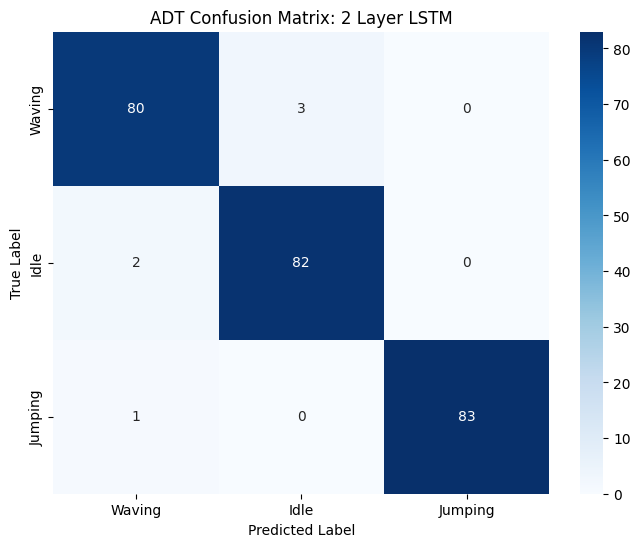

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_ADT:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('ADT Confusion Matrix: 2 Layer LSTM')
plt.show()

#### 1 Layer CNN - 1 Layer LSTM

In [ ]:
model = Model_1CNN_1LSTM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) # Lower LR for small dataset
num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_ADT:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader_ADT:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_ADT):.4f}, Test Accuracy: {accuracy:.2f}%')

Epoch [1/8], Loss: 1.1437, Test Accuracy: 58.57%
Epoch [2/8], Loss: 0.7794, Test Accuracy: 90.04%
Epoch [3/8], Loss: 0.5614, Test Accuracy: 94.82%
Epoch [4/8], Loss: 0.4104, Test Accuracy: 96.81%
Epoch [5/8], Loss: 0.3127, Test Accuracy: 98.01%
Epoch [6/8], Loss: 0.2406, Test Accuracy: 99.20%
Epoch [7/8], Loss: 0.1854, Test Accuracy: 99.20%
Epoch [8/8], Loss: 0.1460, Test Accuracy: 99.20%


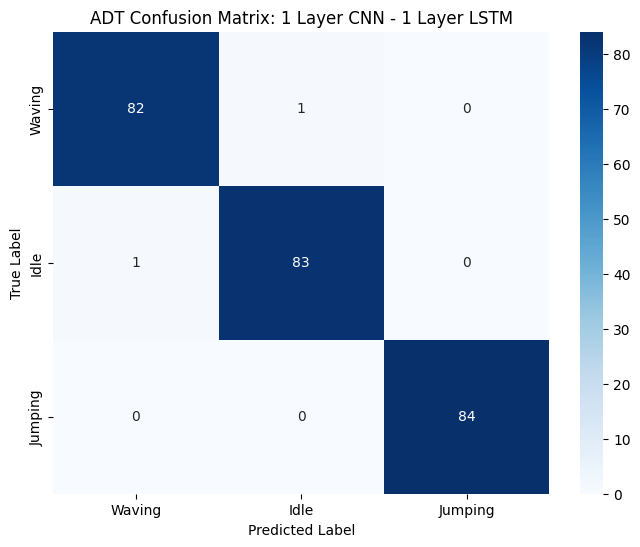

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_ADT:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('ADT Confusion Matrix: 1 Layer CNN - 1 Layer LSTM')
plt.show()

#### 2 Layer CNN - 1 Layer LSTM

In [ ]:
model = Model_2CNN_1LSTM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) # Lower LR for small dataset
num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_ADT:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader_ADT:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_ADT):.4f}, Test Accuracy: {accuracy:.2f}%')

Epoch [1/8], Loss: 1.2235, Test Accuracy: 33.47%
Epoch [2/8], Loss: 1.0630, Test Accuracy: 34.66%
Epoch [3/8], Loss: 0.9130, Test Accuracy: 83.67%
Epoch [4/8], Loss: 0.7204, Test Accuracy: 96.41%
Epoch [5/8], Loss: 0.4915, Test Accuracy: 98.01%
Epoch [6/8], Loss: 0.2960, Test Accuracy: 98.41%
Epoch [7/8], Loss: 0.1676, Test Accuracy: 98.80%
Epoch [8/8], Loss: 0.1039, Test Accuracy: 98.80%


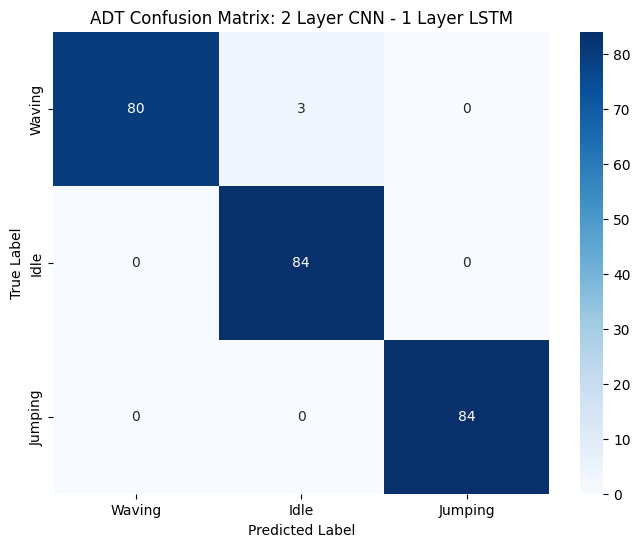

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_ADT:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('ADT Confusion Matrix: 2 Layer CNN - 1 Layer LSTM')
plt.show()

#### 1 Layer CNN - 2 Layer LSTM

In [ ]:
model = Model_1CNN_2LSTM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) # Lower LR for small dataset
num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_ADT:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader_ADT:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_ADT):.4f}, Test Accuracy: {accuracy:.2f}%')

Epoch [1/8], Loss: 1.2661, Test Accuracy: 62.15%
Epoch [2/8], Loss: 0.9647, Test Accuracy: 95.62%
Epoch [3/8], Loss: 0.5095, Test Accuracy: 98.41%
Epoch [4/8], Loss: 0.1707, Test Accuracy: 98.80%
Epoch [5/8], Loss: 0.0659, Test Accuracy: 97.61%
Epoch [6/8], Loss: 0.0379, Test Accuracy: 98.41%
Epoch [7/8], Loss: 0.0258, Test Accuracy: 98.01%
Epoch [8/8], Loss: 0.0210, Test Accuracy: 98.01%


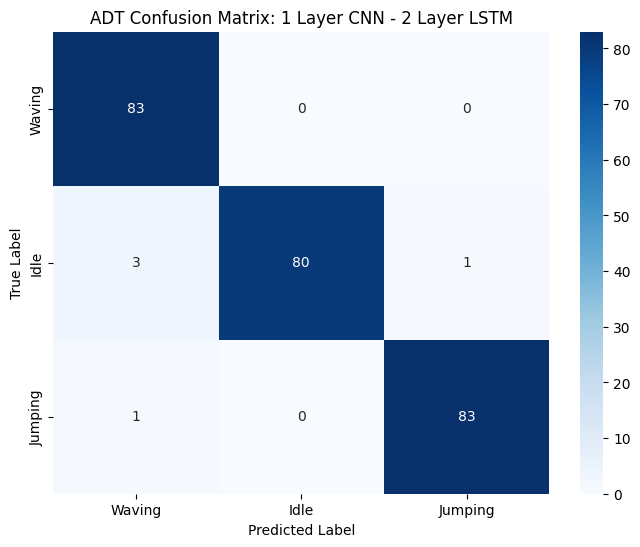

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_ADT:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('ADT Confusion Matrix: 1 Layer CNN - 2 Layer LSTM')
plt.show()

#### 2 Layer CNN - 2 Layer LSTM

In [ ]:
model = Model_2CNN_2LSTM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) # Lower LR for small dataset
num_epochs = 8

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader_ADT:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # --- Evaluation ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader_ADT:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader_ADT):.4f}, Test Accuracy: {accuracy:.2f}%')

Epoch [1/8], Loss: 1.2859, Test Accuracy: 33.07%
Epoch [2/8], Loss: 1.1206, Test Accuracy: 33.86%
Epoch [3/8], Loss: 0.8495, Test Accuracy: 91.24%
Epoch [4/8], Loss: 0.3999, Test Accuracy: 95.62%
Epoch [5/8], Loss: 0.1609, Test Accuracy: 96.41%
Epoch [6/8], Loss: 0.0885, Test Accuracy: 97.21%
Epoch [7/8], Loss: 0.0617, Test Accuracy: 98.41%
Epoch [8/8], Loss: 0.0505, Test Accuracy: 94.42%


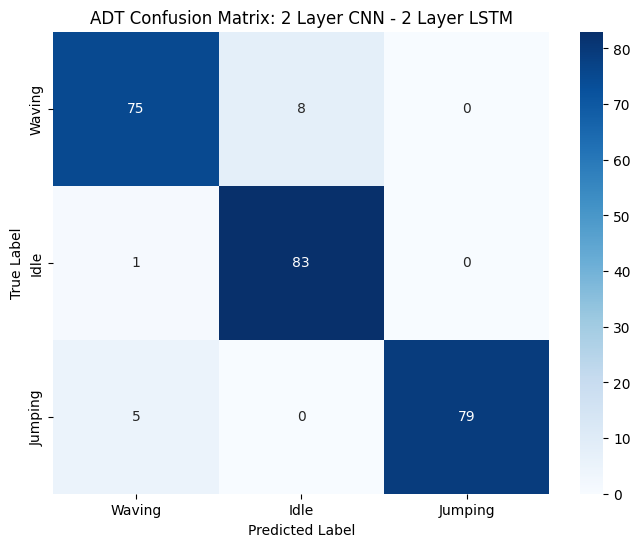

In [ ]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader_ADT:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('ADT Confusion Matrix: 2 Layer CNN - 2 Layer LSTM')
plt.show()